In [ ]:
!pip install transformers

     |████████████████████████████████| 4.2 MB 25.3 MB/s 
     |████████████████████████████████| 596 kB 36.8 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 6.6 MB 52.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import re
import nltk
import string
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import RandomSampler
from torch.optim import Adam
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import transformers
from transformers import BertModel, BertTokenizer
from tqdm import tqdm #tqdm is a library in Python which is used for creating Progress Bars
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
df_tweet=pd.read_csv('/content/drive/MyDrive/cyberbullying_tweets.csv')
df_tweet.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [ ]:
df_tweet.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [ ]:
df_tweet.shape

(47692, 2)

### Data Cleaning

In [ ]:
stop_words=stopwords.words('english')
punct=string.punctuation
stemmer=PorterStemmer()
lemma=WordNetLemmatizer()

In [ ]:
clear_text="@\S+|https\S+|http?:\S|[^A-Za-z0-9]+"
def lower(text):
    return text.lower()
def remove_bad_words(text):
    return re.sub(clear_text,' ', text)
def clean_text(text):
    text=lower(text)
    text=remove_bad_words(text)
    #text=" ".join([stemmer.stem(word) for word in str(text).split() if (word not in stop_words) and (word not in punct)])
    return text

In [ ]:
df_tweet_org=df_tweet.copy()

In [ ]:
df_tweet['tweet_text']=df_tweet['tweet_text'].apply(clean_text)

In [ ]:
df_tweet['tweet_text']=df_tweet['tweet_text'].str.replace('\d+', '')

In [ ]:
df_tweet_org.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
df_tweet.head()

,tweet_text,cyberbullying_type
0,in other words katandandre your food was crapi...,not_cyberbullying
1,why is aussietv so white mkr theblock imaceleb...,not_cyberbullying
2,a classy whore or more red velvet cupcakes,not_cyberbullying
3,meh p thanks for the heads up but not too co...,not_cyberbullying
4,this is an isis account pretending to be a k...,not_cyberbullying


In [ ]:
df_tweet.cyberbullying_type.unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

### Gender based bullying on tweeter 

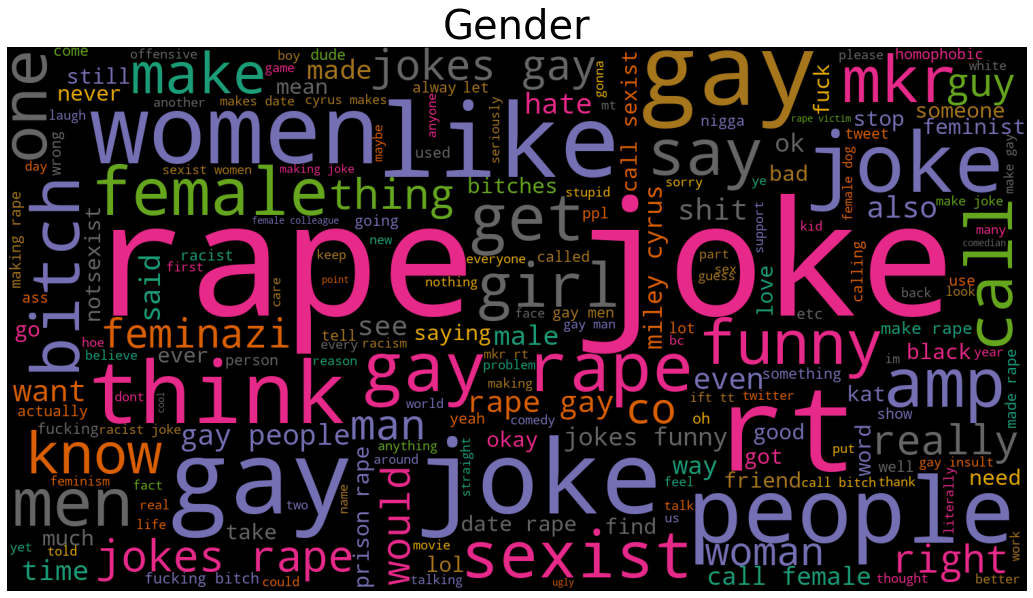

In [ ]:
plt.figure(figsize=(20,10))
df_gender=df_tweet[df_tweet['cyberbullying_type']=='gender']
text_gender=df_gender.tweet_text.values
cloud_gender=WordCloud(background_color='black',colormap='Dark2',width=1500,height=800,stopwords=stop_words).generate(" ".join(text_gender))
plt.axis('off')
plt.title("Gender",fontsize=40)
plt.imshow(cloud_gender)

In [ ]:
vec=CountVectorizer(ngram_range=(1,1),stop_words=stop_words).fit(text_gender)

In [ ]:
bow=vec.transform(text_gender)

In [ ]:
bow_ar=bow.toarray()

In [ ]:
len(bow_ar)

7973

In [ ]:
len(bow_ar[:1][0])

15456

In [ ]:
sow=bow.sum(axis=0)
sow.shape

(1, 15456)

In [ ]:
vec.vocabulary_.items()

dict_items([('rape', 11031), ('real', 11102), ('zvasiyana', 15446), ('nema', 9248), ('jokes', 7200), ('drunk', 3938), ('gay', 5354), ('lesbian', 7841), ('ones', 9717), ('choice', 2279), ('wish', 15028), ('thtz', 13752), ('sensitivity', 12102), ('coming', 2562), ('never', 9273), ('saw', 11901), ('celebrity', 2108), ('say', 11902), ('anything', 584), ('like', 7944), ('obama', 9562), ('maher', 8286), ('incest', 6624), ('joke', 7198), ('colbert', 2497), ('griffin', 5744), ('beheading', 1195), ('mean', 8551), ('uses', 14479), ('gendered', 5410), ('slurs', 12543), ('makes', 8306), ('rt', 11712), ('raul', 11073), ('novoa', 9498), ('aliciabernardez', 351), ('alex', 337), ('aim', 297), ('mecaesmal', 8568), ('feminazi', 4786), ('fact', 4584), ('read', 11096), ('one', 9713), ('post', 10504), ('guy', 5829), ('getting', 5474), ('raped', 11035), ('comments', 2575), ('calling', 1890), ('happy', 5929), ('stfu', 12997), ('really', 11115), ('hope', 6265), ('takes', 13355), ('tf', 13529), ('body', 1499),

In [ ]:
for word,idx in vec.vocabulary_.items():
    print(word)
    print(idx)
    print(sow[0,idx])
    break

rape
11031
4348


In [ ]:
def get_top_ngram(corpus,ngram_range,n=None):
    vec=CountVectorizer(ngram_range=ngram_range,stop_words=stop_words).fit(corpus)
    bag_of_words= vec.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    words_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq,key= lambda x:x[1],reverse=True) # descending
    return words_freq[:n]

In [ ]:
unigram=get_top_ngram(text_gender,(1,1),10)
bigram=get_top_ngram(text_gender,(2,2),10)

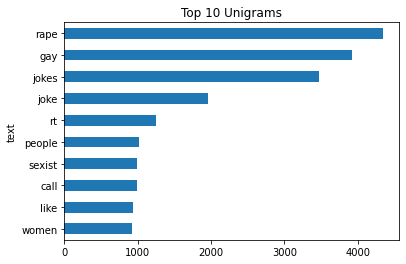

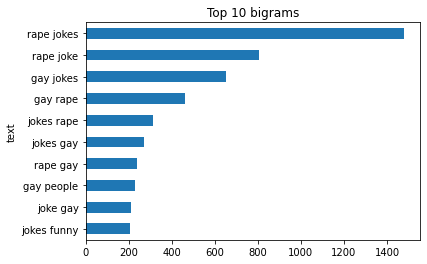

In [ ]:
df_gen1=pd.DataFrame(unigram,columns=['text','count'])
df_gen1.groupby('text').sum()['count'].sort_values().plot(kind='barh',title='Top 10 Unigrams')
plt.show()

df_gen2=pd.DataFrame(bigram,columns=['text','count'])
df_gen2.groupby('text').sum()['count'].sort_values().plot(kind='barh',title='Top 10 bigrams')
plt.show()

### Religion based bullying on tweeter

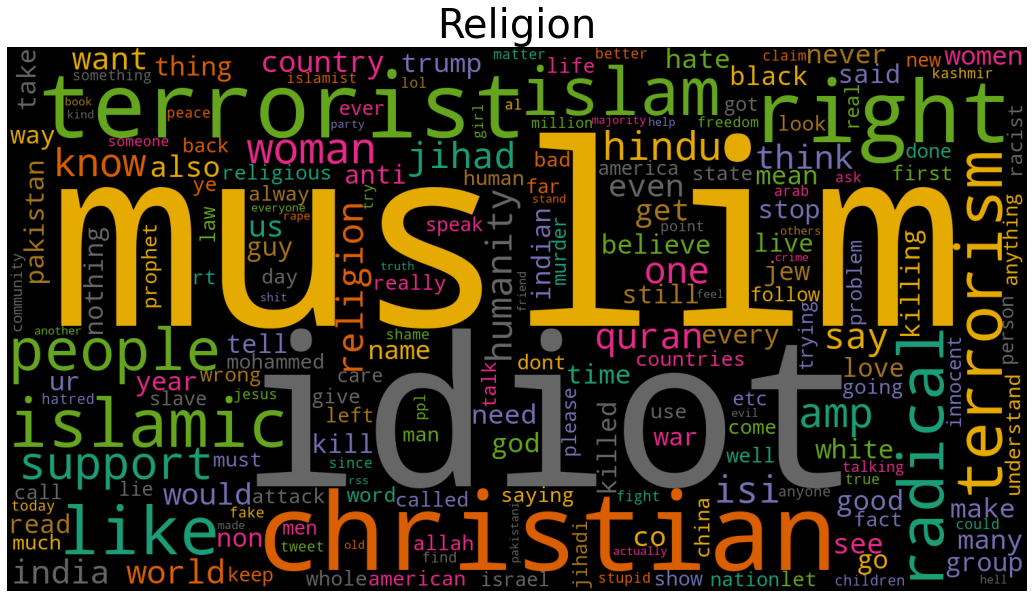

In [ ]:
plt.figure(figsize=(20,10))
df_religion=df_tweet[df_tweet['cyberbullying_type']=='religion']
text_religion=df_religion.tweet_text.values
cloud_religion=WordCloud(background_color='black',colormap='Dark2',collocations=False,width=1500,height=800,stopwords=stop_words).generate(" ".join(text_religion))
plt.axis('off')
plt.title("Religion",fontsize=40)
plt.imshow(cloud_religion)

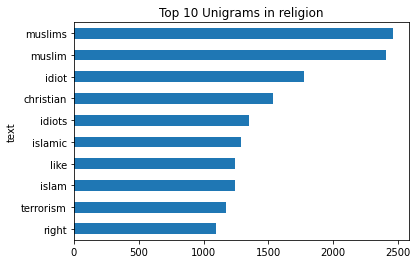

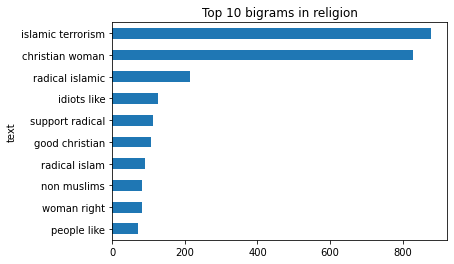

In [ ]:
unigram1=get_top_ngram(text_religion,(1,1),10)
bigram1=get_top_ngram(text_religion,(2,2),10)

df_gen3=pd.DataFrame(unigram1,columns=['text','count'])
df_gen3.groupby('text').sum()['count'].sort_values(ascending=True).plot(kind='barh',title='Top 10 Unigrams in religion')
plt.show()

df_gen4=pd.DataFrame(bigram1,columns=['text','count'])
df_gen4.groupby('text').sum()['count'].sort_values(ascending=True).plot(kind='barh',title='Top 10 bigrams in religion')
plt.show()

### Age based bullying in tweeter

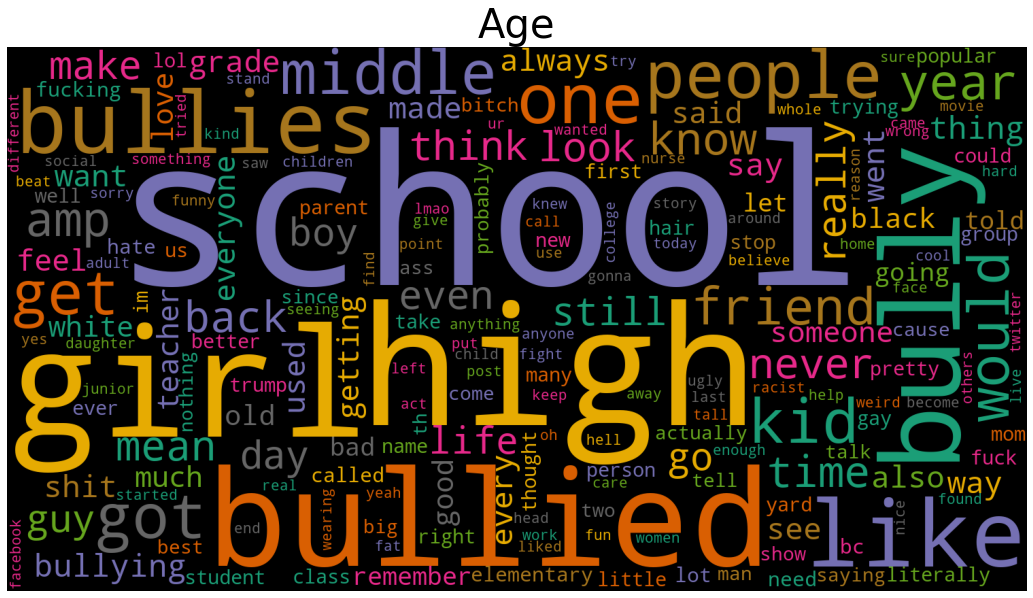

In [ ]:
plt.figure(figsize=(20,10))
df_age=df_tweet[df_tweet['cyberbullying_type']=='age']
text_age=df_age.tweet_text.values
cloud_age=WordCloud(background_color='black',colormap='Dark2',collocations=False,width=1500,height=800,stopwords=stop_words).generate(" ".join(text_age))
plt.axis('off')
plt.title("Age",fontsize=40)
plt.imshow(cloud_age)

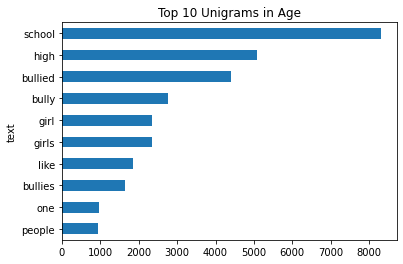

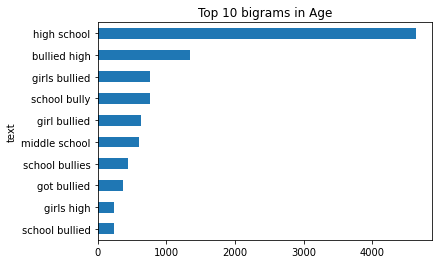

In [ ]:
unigram2=get_top_ngram(text_age,(1,1),10)
bigram2=get_top_ngram(text_age,(2,2),10)

df_gen5=pd.DataFrame(unigram2,columns=['text','count'])
df_gen5.groupby('text').sum()['count'].sort_values(ascending=True).plot(kind='barh',title='Top 10 Unigrams in Age')
plt.show()

df_gen6=pd.DataFrame(bigram2,columns=['text','count'])
df_gen6.groupby('text').sum()['count'].sort_values(ascending=True).plot(kind='barh',title='Top 10 bigrams in Age')
plt.show()

### Ethinicity based bullying in tweeter

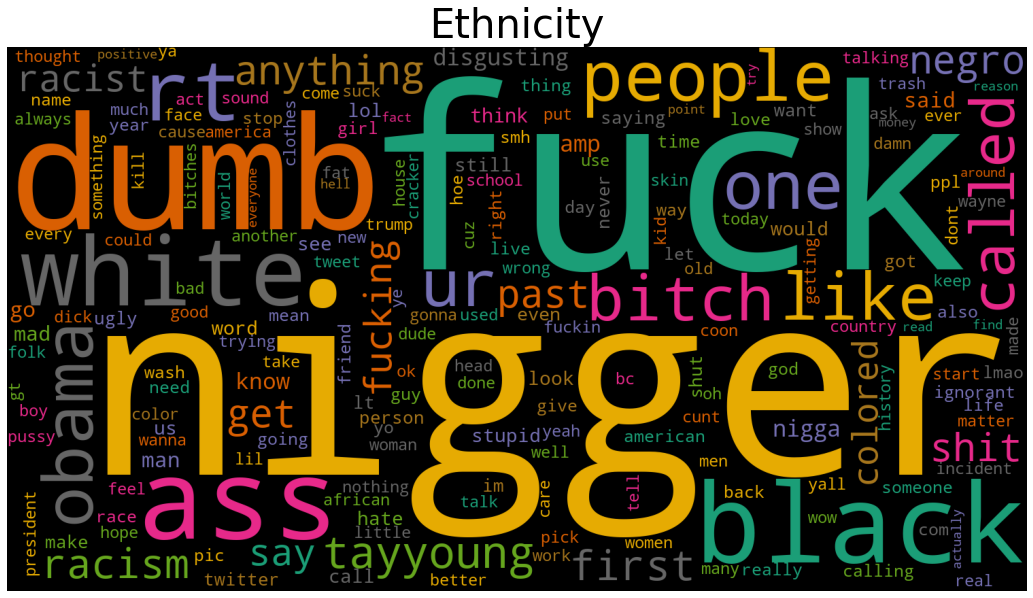

In [ ]:
plt.figure(figsize=(20,10))
df_eth=df_tweet[df_tweet['cyberbullying_type']=='ethnicity']
text_eth=df_eth.tweet_text.values
cloud_eth=WordCloud(background_color='black',colormap='Dark2',collocations=False,width=1500,height=800,stopwords=stop_words).generate(" ".join(text_eth))
plt.axis('off')
plt.title("Ethnicity",fontsize=40)
plt.imshow(cloud_eth)

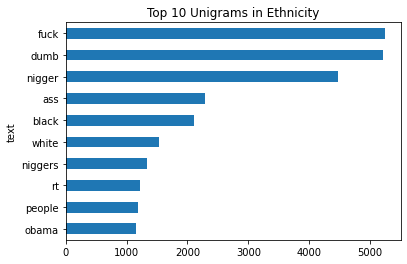

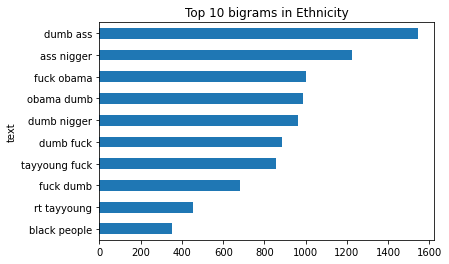

In [ ]:
unigram3=get_top_ngram(text_eth,(1,1),10)
bigram3=get_top_ngram(text_eth,(2,2),10)

df_gen7=pd.DataFrame(unigram3,columns=['text','count'])
df_gen7.groupby('text').sum()['count'].sort_values(ascending=True).plot(kind='barh',title='Top 10 Unigrams in Ethnicity')
plt.show()

df_gen8=pd.DataFrame(bigram3,columns=['text','count'])
df_gen8.groupby('text').sum()['count'].sort_values(ascending=True).plot(kind='barh',title='Top 10 bigrams in Ethnicity')
plt.show()

In [ ]:
df_tweet.cyberbullying_type.value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [ ]:
df_tweet.head()

,tweet_text,cyberbullying_type
0,in other words katandandre your food was crapi...,not_cyberbullying
1,why is aussietv so white mkr theblock imaceleb...,not_cyberbullying
2,a classy whore or more red velvet cupcakes,not_cyberbullying
3,meh p thanks for the heads up but not too co...,not_cyberbullying
4,this is an isis account pretending to be a k...,not_cyberbullying


In [ ]:
df_tweet=df_tweet.rename(columns={'tweet_text': 'text', 'cyberbullying_type': 'sentiment'})
df_tweet.head()

,text,sentiment
0,in other words katandandre your food was crapi...,not_cyberbullying
1,why is aussietv so white mkr theblock imaceleb...,not_cyberbullying
2,a classy whore or more red velvet cupcakes,not_cyberbullying
3,meh p thanks for the heads up but not too co...,not_cyberbullying
4,this is an isis account pretending to be a k...,not_cyberbullying


In [ ]:
df_tweet.duplicated().sum()

418

In [ ]:
df_t=df_tweet[~df_tweet.duplicated()]
df_t.shape

(47274, 2)

In [ ]:
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split() if (word not in stop_words) and (word not in punct)])

In [ ]:
def lemma_words(text):
    return " ".join([lemma.lemmatize(word) for word in text.split()])

In [ ]:
df_t['text']=df_t['text'].apply(lambda text: stem_words(text))

In [ ]:
df_t['text']=df_t['text'].apply(lambda text: lemma_words(text))

In [ ]:
df_t.sentiment.value_counts()

religion               7986
age                    7950
ethnicity              7902
not_cyberbullying      7893
gender                 7891
other_cyberbullying    7652
Name: sentiment, dtype: int64

In [ ]:
df_t.duplicated().sum()

386

In [ ]:
df_t=df_t[~df_t.duplicated()]
df_t.shape

(46888, 2)

In [ ]:
df_t=df_t[df_t['sentiment']!='other_cyberbullying']
df_t.shape

(39356, 2)

In [ ]:
def text_len(text):
    return len(text.split())

In [ ]:
df_t['text_len']=df_t['text'].apply(lambda text:text_len(text))

In [ ]:
df_t.head()

,text,sentiment,text_len
0,word katandandr food crapilici mkr,not_cyberbullying,5
1,aussietv white mkr theblock imacelebrityau tod...,not_cyberbullying,11
2,classi whore red velvet cupcak,not_cyberbullying,5
3,meh p thank head concern anoth angri dude twitter,not_cyberbullying,9
4,isi account pretend kurdish account like islam...,not_cyberbullying,8


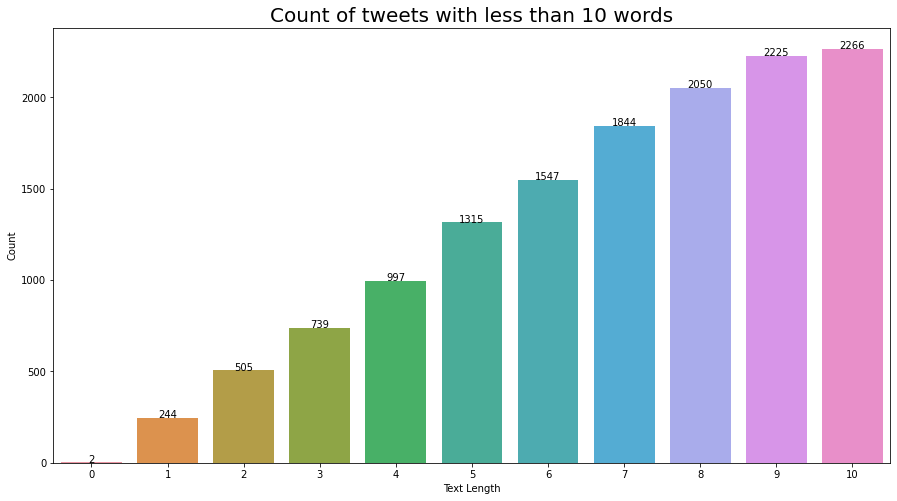

In [ ]:
plt.figure(figsize=(15,8))
ax=sns.countplot(x='text_len',data=df_t[df_t['text_len']<=10])
plt.title('Count of tweets with less than 10 words', fontsize=20)
plt.ylabel('Count')
plt.xlabel('Text Length')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,
        p.get_height(),ha="center")
plt.show()

In [ ]:
max_len = np.max(df_t['text_len'])
max_len 

199

In [ ]:
df_t = df_t[df_t['text_len'] > 3]
df_t = df_t[df_t['text_len'] < 200]
df_t.shape

(37866, 3)

In [ ]:
max_len = np.max(df_t['text_len'])
max_len 

199

In [ ]:
df_t['sentiment'] = df_t['sentiment'].replace({'religion':0,'age':1,'ethnicity':2,'gender':3,'not_cyberbullying':4})

In [ ]:
df_t.head()

,text,sentiment,text_len
0,word katandandr food crapilici mkr,4,5
1,aussietv white mkr theblock imacelebrityau tod...,4,11
2,classi whore red velvet cupcak,4,5
3,meh p thank head concern anoth angri dude twitter,4,9
4,isi account pretend kurdish account like islam...,4,8


In [ ]:
X = df_t['text']
Y = df_t['sentiment']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(30292,)
(7574,)
(30292,)
(7574,)


In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.1, stratify=Y_train, random_state=10)
print(X_train.shape)
print(X_valid.shape)
print(Y_train.shape)
print(Y_valid.shape)

(27262,)
(3030,)
(27262,)
(3030,)


In [ ]:
(unique, counts) = np.unique(Y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 5715],
       [   1, 5643],
       [   2, 5615],
       [   3, 5482],
       [   4, 4807]])

In [ ]:
ros=RandomOverSampler()
X_train,Y_train=ros.fit_resample(np.array(X_train).reshape(-1,1),np.array(Y_train).reshape(-1,1))
OS_train=pd.DataFrame(list(zip([x[0] for x in X_train],Y_train)),columns=['text','sentiment'])

In [ ]:
X_train.shape,Y_train.shape

((28575, 1), (28575,))

In [ ]:
X_train=OS_train['text'].values
Y_train=OS_train['sentiment'].values

In [ ]:
(unique, counts) = np.unique(Y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 5715],
       [   1, 5715],
       [   2, 5715],
       [   3, 5715],
       [   4, 5715]])

## Naive Bayes Classifier

In [ ]:
cvr=CountVectorizer()
X_train_cv=cvr.fit_transform(X_train)
X_test_cv=cvr.transform(X_test)

In [ ]:
X_valid_cv=cvr.transform(X_valid)
X_valid.shape

(3030,)

In [ ]:
cvr.vocabulary_

{'def': 6270,
 'felt': 8789,
 'insecur': 12556,
 'height': 11235,
 'high': 11389,
 'school': 23130,
 'girl': 10105,
 'taller': 25718,
 'well': 28826,
 'never': 18080,
 'bulli': 3570,
 'call': 3792,
 'tall': 25717,
 'derogatori': 6472,
 'way': 28723,
 'dumb': 7404,
 'bless': 2912,
 'heap': 11173,
 'upon': 27914,
 'american': 895,
 'negro': 18003,
 'night': 18250,
 'ago': 460,
 'man': 16030,
 'would': 29326,
 'america': 893,
 'white': 28974,
 'un': 27566,
 'diplomat': 6786,
 'ambassador': 871,
 'companion': 5111,
 'king': 14309,
 'gave': 9819,
 'hotel': 11710,
 'suit': 25302,
 'bed': 2352,
 'even': 8202,
 'thought': 26439,
 'dream': 7276,
 'whatev': 28911,
 'nobl': 18370,
 'prize': 20760,
 'muslim': 17591,
 'bright': 3366,
 'histori': 11486,
 'idiot': 12067,
 'match': 16284,
 'normal': 18454,
 'beat': 2314,
 'shit': 23748,
 'haha': 10813,
 'alright': 803,
 'thank': 26128,
 'david': 6081,
 'everi': 8212,
 'fk': 9022,
 'gone': 10297,
 'russian': 22643,
 'culprit': 5761,
 'killer': 14269,
 

In [ ]:
len(cvr.vocabulary_)

30131

In [ ]:
tf_idf=TfidfTransformer(use_idf=True)
X_train_tf=tf_idf.fit_transform(X_train_cv)
X_test_tf=tf_idf.fit_transform(X_test_cv)

In [ ]:
X_valid_tf=tf_idf.fit_transform(X_valid_cv)
X_valid.shape

(3030,)

In [ ]:
X_train_tf.shape,X_test_tf.shape,X_valid_tf.shape

((28575, 30131), (7574, 30131), (3030, 30131))

In [ ]:
nbc=MultinomialNB()

In [ ]:
nbc.fit(X_train_tf,Y_train)

MultinomialNB()

In [ ]:
nb_pred=nbc.predict(X_test_tf)

In [ ]:
sentiments = ["religion","age","ethnicity","gender","not_cyberbullying"]

In [ ]:
print('Classification Report for Naive Bayes:\n',classification_report(Y_test, nb_pred, target_names=sentiments))

Classification Report for Naive Bayes:
                    precision    recall  f1-score   support

         religion       0.84      0.96      0.90      1588
              age       0.78      0.99      0.87      1568
        ethnicity       0.93      0.91      0.92      1560
           gender       0.89      0.86      0.87      1523
not_cyberbullying       0.85      0.51      0.64      1335

         accuracy                           0.86      7574
        macro avg       0.86      0.84      0.84      7574
     weighted avg       0.86      0.86      0.85      7574



In [ ]:
def plot_confusion_matrix(test,pred,title):
    plt.figure(figsize=(10,6))
    cm=confusion_matrix(test,pred)
    conf_matrix=pd.DataFrame(data=cm,columns=[sentiments[0],sentiments[1],sentiments[2],sentiments[3],sentiments[4]],
                             index=[sentiments[0],sentiments[1],sentiments[2],sentiments[3],sentiments[4]])
    sns.heatmap(conf_matrix,annot=True,annot_kws={'size':25},linewidths=0.1,cmap=ListedColormap(['lightskyblue']),fmt='d')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title(title,fontsize=20)
    plt.xlabel('Predicted',fontsize=20)
    plt.ylabel('Actual',fontsize=20)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

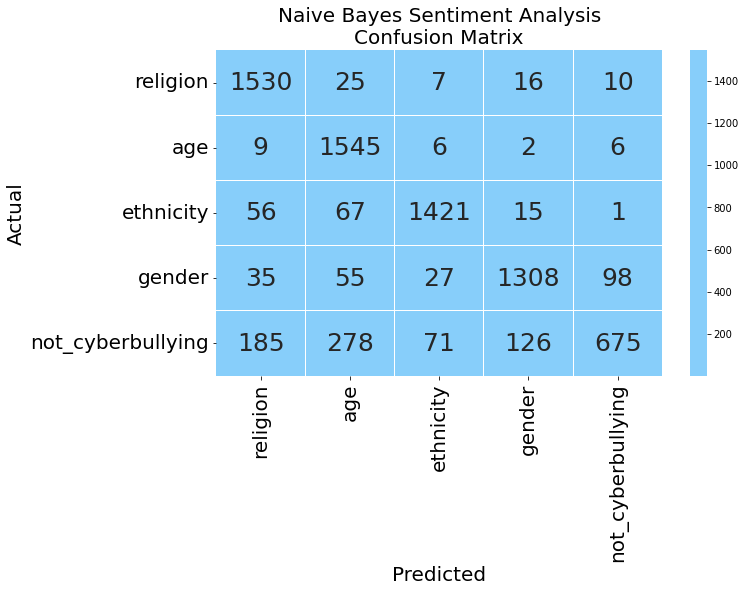

In [ ]:
plot_confusion_matrix(Y_test,nb_pred,'Naive Bayes Sentiment Analysis\nConfusion Matrix')

The performance scores of the algorithm is some what good, with an overall accurcy of 86%. We can observe how the predictions for the more populated classes have very high F1 scores (over 87%), while for the class "not_cyberbullying" the score is 64%

In [ ]:
DEVICE='cuda' if torch.cuda.is_available() else 'cpu'

## BERT Classification

In [ ]:
bert_df=df_t[['text','sentiment']]
bert_df.head()

,text,sentiment
0,word katandandr food crapilici mkr,4
1,aussietv white mkr theblock imacelebrityau tod...,4
2,classi whore red velvet cupcak,4
3,meh p thank head concern anoth angri dude twitter,4
4,isi account pretend kurdish account like islam...,4


In [ ]:
bert_df.shape

(37866, 2)

In [ ]:
b_tokenizer=BertTokenizer.from_pretrained('bert-base-cased')
labels={'religion':0,'age':1,'ethnicity':2,'gender':3,'not_cyberbullying':4}

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self,df):
        self.labels=[list(labels.values())[label] for label in df['sentiment']]
        self.texts=[b_tokenizer(text,padding='max_length',max_length=512,return_tensors='pt') for text in df['text']]
    def classes(self):
        return self.labels
    def __len__(self):
        return len(self.labels)
    def get_batch_labels(self,idx):
        return np.array(self.labels[idx])
    def get_batch_texts(self,idx):
        return self.texts[idx]
    def __getitem__(self,idx):
        batch_texts=self.get_batch_texts(idx)
        batch_y=self.get_batch_labels(idx)
        return batch_texts,batch_y

In [ ]:
len(bert_df)

37866

In [ ]:
int(.8*len(bert_df))

30292

In [ ]:
int(.9*len(bert_df))

34079

In [ ]:
bert_train,bert_val,bert_test=np.split(bert_df,[int(.8*len(bert_df)),int(.9*len(bert_df))])
print(len(bert_train),len(bert_val), len(bert_test))

30292 3787 3787


In [ ]:
bert_train.shape,bert_val.shape,bert_test.shape

((30292, 2), (3787, 2), (3787, 2))

### BERT Model Building

In [ ]:
class BertClassifier(nn.Module):
    def __init__(self,dropout=0.5):
        super(BertClassifier,self).__init__()
        self.bert=BertModel.from_pretrained('bert-base-cased')
        self.dropout=nn.Dropout(dropout)
        self.linear=nn.Linear(768,5)
        self.relu=nn.ReLU()
    def forward(self,input_id,mask):
        emb_vec_tok_seq, emb_vec_cls_tok=self.bert(input_ids=input_id,attention_mask=mask,return_dict=False)
        dropout_op=self.dropout(emb_vec_cls_tok)
        linear_op=self.linear(dropout_op)
        final_op=self.relu(linear_op)
        return final_op

### Pytorch Training Loop

In [ ]:
def train(model,train_data,val_data,lr,epochs):
    train,val=Dataset(train_data),Dataset(val_data)
    train_dataloader=DataLoader(train,batch_size=15,shuffle=True)
    val_dataloader=DataLoader(val,batch_size=15,shuffle=True)
    losses=nn.CrossEntropyLoss()
    optimizer=Adam(model.parameters(),lr=lr)
    use_cuda = torch.cuda.is_available()
    DEVICE = torch.device("cuda" if use_cuda else "cpu")
    if use_cuda:
        model=model.cuda()
        losses=losses.cuda()
    for epoch in range(epochs):
        tot_train_acc,tot_train_loss=0,0
        for train_input,train_target in tqdm(train_dataloader):
            train_target=train_target.type(torch.long)
            train_target=train_target.to(DEVICE)
            mask=train_input['attention_mask'].to(DEVICE)
            input_id=train_input['input_ids'].squeeze(1).to(DEVICE)
            output=model(input_id,mask)
            batch_loss=losses(output,train_target)
            tot_train_loss+=batch_loss.item()
            acc=(output.argmax(dim=1)==train_target).sum().item()
            tot_train_acc+=acc
            model.zero_grad()
            batch_loss.backward()
            optimizer.step()
        tot_val_acc,tot_val_loss=0,0
        with torch.no_grad():
            for val_input,val_target in val_dataloader:
                val_target=val_target.type(torch.long)
                val_target=val_target.to(DEVICE)
                mask=val_input['attention_mask'].to(DEVICE)
                input_id=val_input['input_ids'].squeeze(1).to(DEVICE)
                output=model(input_id,mask)
                batch_loss=losses(output,val_target)
                tot_val_loss+=batch_loss.item()
                acc=(output.argmax(dim=1)==val_target).sum().item()
                tot_val_acc+=acc
        print(f'Epochs: {epoch + 1} | Train Loss: {tot_train_loss / len(train_data): .3f} \
                | Train Accuracy: {tot_train_acc / len(train_data): .3f} \
                | Val Loss: {tot_val_loss / len(val_data): .3f} \
                | Val Accuracy: {tot_val_acc / len(val_data): .3f}')
    torch.save(model,'/content/drive')

In [ ]:
EPOCHS=5
LR=0.000001
model=BertClassifier()

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
train(model,bert_train,bert_val,LR,EPOCHS)

100%|██████████| 2020/2020 [41:25<00:00,  1.23s/it]


Epochs: 1 | Train Loss:  0.050                 | Train Accuracy:  0.749                 | Val Loss:  0.193                 | Val Accuracy:  0.001


100%|██████████| 2020/2020 [41:36<00:00,  1.24s/it]


Epochs: 2 | Train Loss:  0.018                 | Train Accuracy:  0.918                 | Val Loss:  0.100                 | Val Accuracy:  0.590


100%|██████████| 2020/2020 [41:36<00:00,  1.24s/it]


Epochs: 3 | Train Loss:  0.014                 | Train Accuracy:  0.934                 | Val Loss:  0.084                 | Val Accuracy:  0.721


100%|██████████| 2020/2020 [41:36<00:00,  1.24s/it]


Epochs: 4 | Train Loss:  0.012                 | Train Accuracy:  0.945                 | Val Loss:  0.072                 | Val Accuracy:  0.767


100%|██████████| 2020/2020 [41:36<00:00,  1.24s/it]


Epochs: 5 | Train Loss:  0.009                 | Train Accuracy:  0.957                 | Val Loss:  0.063                 | Val Accuracy:  0.790


IsADirectoryError: ignored

In [ ]:
def evaluate(model,test_data):
  test=Dataset(test_data)
  test_dataloader=DataLoader(test,batch_size=15)
  use_cuda = torch.cuda.is_available()
  device = torch.device("cuda" if use_cuda else "cpu")
  if use_cuda:
        model = model.cuda()
  tot_test_acc = 0
  with torch.no_grad():
    for test_input,test_target in test_dataloader:
      test_target=test_target.type(torch.long)
      test_target=test_target.to(device)
      mask=test_input['attention_mask'].to(device)
      input_id=test_input['input_ids'].squeeze(1).to(device)
      output = model(input_id, mask)
      acc = (output.argmax(dim=1) == test_target).sum().item()
      tot_test_acc+=acc
  print(f'Test Accuracy: {tot_test_acc / len(test_data): .3f}')

In [ ]:
evaluate(model,bert_test)

Test Accuracy:  0.790


In [ ]:
torch.save(model.state_dict(),'/content/drive/MyDrive/Cyber_Bullying_Classification/CBC_model.pt')